# Función de Gompertz
 O número de falecementos nunha epidemia modelízase por:<br>
 ### $P(t)=ke^{-ln(k/P_0)e^{-ct}}$ <br>
 onde k=Tendencia final <br>
 Falecementos no momento t=0 <br>
 Parámetro que ten que ver coa velocidade de propagación (China c=0,08)

In [281]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
P0=10
c=0.08 #É o valor que mellor axustou os primeiros países (China, Spain)
numObs=30 #Número de datos observados a partir do P0 falecemento sobre os que se fai a estimación

file="https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_deaths_global.csv&filename=time_series_covid19_deaths_global.csv"
datos=pd.read_csv(file,usecols = lambda column : column not in ["Lat" , "Long"],keep_default_na=False)
#Data dos datos
_,colHoxe=datos.shape
hoxe=datos.columns[colHoxe-1]

#Correximos os datos que veñen desagregados por provincias
datosAgrup=datos.groupby('Country/Region').sum().reset_index()
datosAgrup.head(5)

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,1010,1012,1048,1094,1113,1147,1164,1181,1185,1186
1,Albania,0,0,0,0,0,0,0,0,0,...,93,95,97,101,104,107,111,112,113,117
2,Algeria,0,0,0,0,0,0,0,0,0,...,1011,1018,1028,1040,1052,1057,1068,1078,1087,1100
3,Andorra,0,0,0,0,0,0,0,0,0,...,52,52,52,52,52,52,52,52,52,52
4,Angola,0,0,0,0,0,0,0,0,0,...,26,26,26,27,28,29,29,29,29,30


Reaxustamos os datos en forma 'Columna-Valor' para maior comodidade, <br>
a partir do falecemento 100

In [282]:
datosSeries=datosAgrup.melt(id_vars='Country/Region',var_name='Día',value_name='Valor')
datosSeries=datosSeries.loc[datosSeries["Valor"]>=P0]
datosSeries

,Country/Region,Día,Valor
36,China,1/22/20,17
224,China,1/23/20,18
412,China,1/24/20,26
600,China,1/25/20,42
788,China,1/26/20,56
...,...,...,...
34209,Venezuela,7/21/20,120
34211,West Bank and Gaza,7/21/20,64
34213,Yemen,7/21/20,456
34214,Zambia,7/21/20,128


### Serie dun País

In [283]:
Pais="Spain"
datosPais=datosSeries.loc[(datosSeries['Country/Region']==Pais)]

#### Representación Gráfica

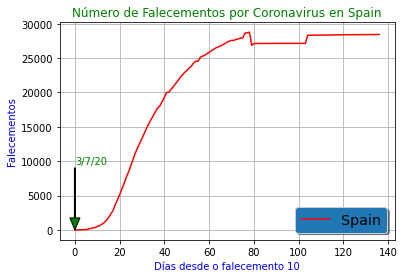

In [284]:
primerDia=list(datosPais['Día'])[0]
numDias, _ = datosPais.shape
dias=np.arange(0,numDias)
fig, ax = plt.subplots()

ax.plot(dias,datosPais['Valor'],'r',label=Pais)
legend = ax.legend(loc='lower right', shadow=True, fontsize='x-large')
legend.get_frame().set_facecolor('C0')
ax.annotate(primerDia, xy=(0, np.amin(datosPais['Valor'])), 
            xytext=(0, P0+(np.amax(datosPais['Valor'])-P0)/3),
            arrowprops=dict(facecolor='green',width=1,headwidth=10),color='green')
ax.set_title("Número de Falecementos por Coronavirus en "+Pais,color='green')
ax.set_xlabel("Días desde o falecemento "+str(P0),color="blue")
ax.set_ylabel("Falecementos",color="blue")
plt.grid()
plt.show()

Axustaremos a función de Gompertz (parámetro k) <br>
por mínimos cadrados probando de 100 e 100 entre k=P0 e k=100.000 (sabemos que non pasa daí agás US) <br>
cos datos do primeiro mes desde o falecemento número P0

In [285]:
#Función de Gompertz
def gompertz(k,P0,c,t):
    return k*np.exp(-np.log(k/P0)*np.exp(-c*t))

gompertz(27000,10,0.08,60)

25300.2322753172

In [286]:
#Axuste do Parámetro k
def gompertzFit(x,Y,P0,c):
    minimo=f(P0,x,Y,P0,c)
    k0=P0
    for k in range(P0,100000,100):
            valor=gompertzMinCad(k,x,Y,P0,c)
            if valor<minimo:
                minimo=valor
                k0=k
    return k0

def gompertzMinCad(k,x,Y,P0,c):
    suma=0
    for i in range(len(Y)):
            suma+=(Y[i]-gompertz(k,P0,c,x[i]))**2
    return suma
k=gompertzFit(dias[0:numObs],list(datosPais['Valor'])[0:numObs],P0,0.08)
k

26910

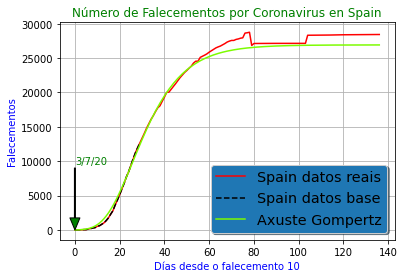

In [287]:
fig, ax = plt.subplots()

ax.plot(dias,datosPais['Valor'],'r',label=Pais+" datos reais")
ax.plot(dias[0:numObs],datosPais['Valor'][0:numObs],'k--',label=Pais+" datos base")
ax.plot(dias,gompertz(k,P0,c,dias),'lawngreen',label='Axuste Gompertz')
legend = ax.legend(loc='lower right', shadow=True, fontsize='x-large')
legend.get_frame().set_facecolor('C0')
ax.annotate(primerDia, xy=(0, np.amin(datosPais['Valor'])), 
            xytext=(0, P0+(np.amax(datosPais['Valor'])-P0)/3),
            arrowprops=dict(facecolor='green',width=1,headwidth=10),color='green')
ax.set_title("Número de Falecementos por Coronavirus en "+Pais,color='green')
ax.set_xlabel("Días desde o falecemento "+str(P0),color="blue")
ax.set_ylabel("Falecementos",color="blue")
plt.grid()
plt.show()

In [288]:
#Lista de 15 paises con máis falecementos (sen US)
lista=list(pd.DataFrame(datosSeries.groupby('Country/Region')['Valor'].max())
     .sort_values('Valor',ascending=False).head(61).reset_index()['Country/Region'])
lista.remove('US')
lista[0:10]

['Brazil',
 'United Kingdom',
 'Mexico',
 'Italy',
 'France',
 'Spain',
 'India',
 'Iran',
 'Peru',
 'Russia']

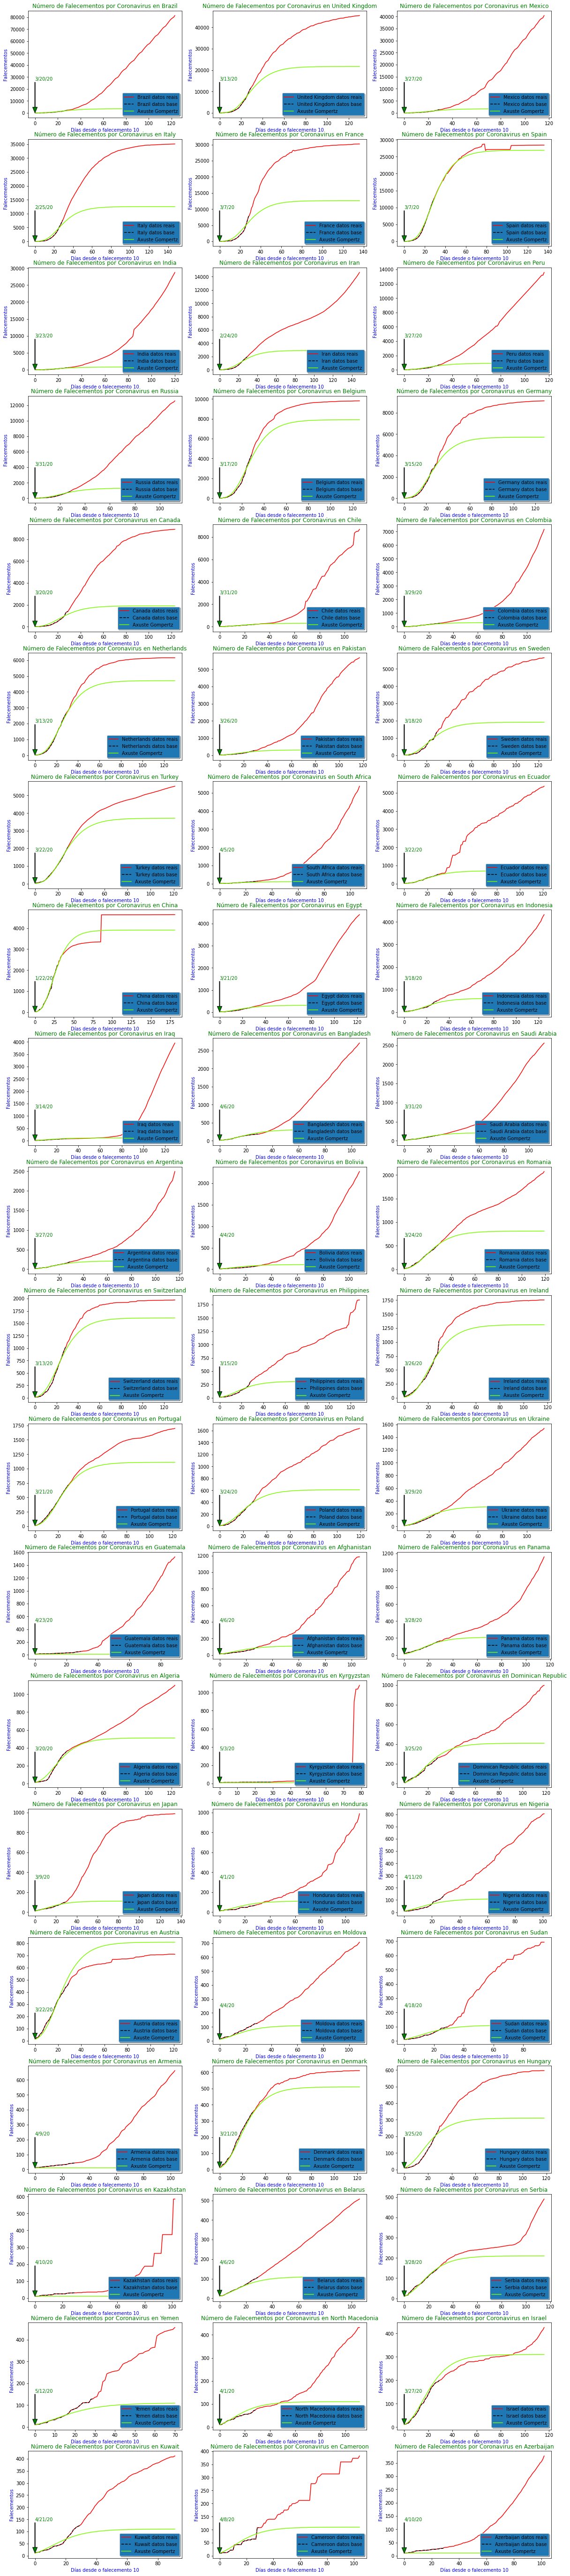

In [291]:
fig, _ = plt.subplots(20,3,figsize=(20,100))
for i,Pais in enumerate(lista):
    datosPais=datosSeries.loc[(datosSeries['Country/Region']==Pais)]
    primerDia=list(datosPais['Día'])[0]
    numDias, _ = datosPais.shape
    dias=np.arange(0,numDias)
    ax=plt.subplot(20,3,i+1)
    ax.plot(dias,datosPais['Valor'],'r',label=Pais+" datos reais")
    ax.plot(dias[0:numObs],datosPais['Valor'][0:numObs],'k--',label=Pais+" datos base")
    k=gompertzFit(dias[0:numObs],list(datosPais['Valor'])[0:numObs],P0,0.08)
    ax.plot(dias,gompertz(k,P0,c,dias),'lawngreen',label='Axuste Gompertz')
    legend = ax.legend(loc='lower right', shadow=True, fontsize='medium')
    legend.get_frame().set_facecolor('C0')
    ax.annotate(primerDia, xy=(0, np.amin(datosPais['Valor'])), 
                xytext=(0, P0+(np.amax(datosPais['Valor'])-P0)/3),
                arrowprops=dict(facecolor='green',width=1,headwidth=10),color='green')
    ax.set_title("Número de Falecementos por Coronavirus en "+Pais,color='green')
    ax.set_xlabel("Días desde o falecemento "+str(P0),color="blue")
    ax.set_ylabel("Falecementos",color="blue")
plt.show()